In [1]:
# http://www.kenbenoit.net/courses/ME104/logmodels2.pdf
# Name: Gabe Eapen
# UT EID: eapengp
# PS1 - Q3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg
from sklearn.preprocessing import FunctionTransformer

In [3]:
df=pd.read_stata("pollution.dta")
print(df.columns)

Index([u'prec', u'jant', u'jult', u'ovr65', u'popn', u'educ', u'hous', u'dens',
       u'nonw', u'wwdrk', u'poor', u'hc', u'nox', u'so2', u'humid', u'mort'],
      dtype='object')


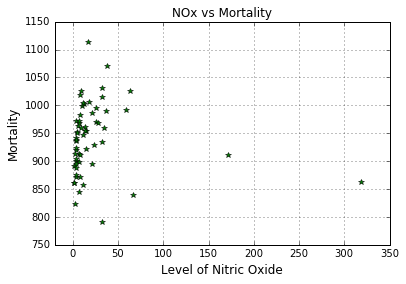

In [4]:
#Part a
part_a, = plt.plot(df["nox"],df["mort"],'g*')
plt.grid(True)
plt.ylabel("Mortality",fontsize=12)
plt.xlabel("Level of Nitric Oxide",fontsize=12)
plt.title("NOx vs Mortality")
plt.xlim(-20, 350)
plt.show()

In [5]:
#Part b
# http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.lstsq.html
# B1 = m; B0 = c
# y = B1x + B0
# y = Ap, where A = [[x 1]] and p = [[B1], [B0]]
x = df["nox"]
A = np.vstack([x, np.ones(len(x))]).T
#print A
y = np.array(df["mort"])
#m, c = np.linalg.lstsq(A, y)[0]
B1, B0 = np.linalg.lstsq(A, y)[0]
print("B1 is: {}.".format(round(B1,8)))
print("B0 is: {}.".format(round(B0,8)))


B1 is: -0.10388706.
B0 is: 942.71147529.


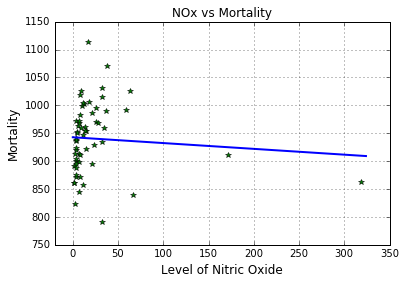

In [6]:
#Part b
# Add bestfit line to ScatterPlot using B1 and B0 values
# y = B1x + B0

part_b, = plt.plot(df["nox"],df["mort"],'g*')
plt.grid(True)
plt.ylabel("Mortality",fontsize=12)
plt.xlabel("Level of Nitric Oxide",fontsize=12)
plt.title("NOx vs Mortality")
plt.xlim(-20, 350)
xVals = np.arange(0, 325)
yVals = (B1*xVals) + B0
plt.plot(xVals,yVals,'b-',linewidth=2.0)
plt.show()

In [7]:
#part c
# Try log-log
logX = np.log(df["nox"])
logY = np.log(df["mort"])

A = np.vstack([logX, np.ones(len(logX))]).T
#print A
y = np.array(logY)
#m, c = np.linalg.lstsq(A, y)[0]
loglogB1, loglogB0 = np.linalg.lstsq(A, y)[0]
print("B1 is: {}.".format(round(loglogB1,8)))
print("B0 is: {}.".format(round(loglogB0,8)))

B1 is: 0.01589323.
B0 is: 6.80717471.


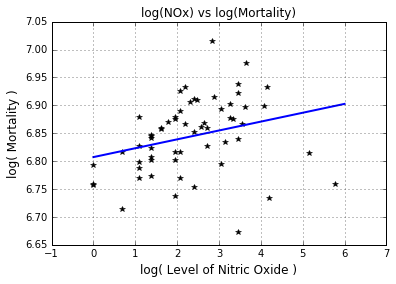

In [8]:
#part c
# Plot log-log

part_c1, = plt.plot(logX,logY,'k*')
plt.grid(True)
plt.ylabel("log( Mortality )",fontsize=12)
plt.xlabel("log( Level of Nitric Oxide )",fontsize=12)
plt.title("log(NOx) vs log(Mortality)")
plt.xlim(-1, 7)
xVals = np.arange(0, 7)
yVals = (loglogB1*xVals) + loglogB0
plt.plot(xVals,yVals,'b-',linewidth=2.0)
plt.show()

In [9]:
#part c
# Try log-linear
logX = np.log(df["nox"])
linY = df["mort"]

A = np.vstack([logX, np.ones(len(logX))]).T
#print A
y = np.array(linY)
#m, c = np.linalg.lstsq(A, y)[0]
loglinB1, loglinB0 = np.linalg.lstsq(A, y)[0]
print("B1 is: {}.".format(round(loglinB1,8)))
print("B0 is: {}.".format(round(loglinB0,8)))

B1 is: 15.33549673.
B0 is: 904.72446381.


In [ ]:
#part c
# Plot log-lin

part_c1, = plt.plot(logX,linY,'ro')
plt.grid(True)
plt.ylabel("Mortality",fontsize=12)
plt.xlabel("log( Level of Nitric Oxide )",fontsize=12)
plt.title("log(NOx) vs Mortality")
plt.xlim(-1, 7)
xVals = np.arange(0, 7)
yVals = (loglinB1*xVals) + loglinB0
plt.plot(xVals,yVals,'b-',linewidth=2.0)
plt.show()